# Add New Data & Write Similarity Report
---

### 개요
* 기존의 **유사도 모델(similarity_model)**에 **new_data**를 입력시키면, 
    * 기존 모델의 network에 새로 입력된 data의 **node와 edge가 추가/저장**(similarity_matrix 확장)되며, 
    * 입력된 **new_data**를 기준으로 한 **유사도 보고서(similarity_report)**를 계산하여 반환함 

---
* 아래는 기존의 similarity_model에 새로은 data를 추가하여 확장된 similarity_model을 구성&저장하고 similarity_report를 출력하는 과정임 

<img src="https://raw.githubusercontent.com/jhyun0919/EnergyData_jhyun/master/docs/images/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7%202016-05-19%20%EC%98%A4%EC%A0%84%2010.06.30.jpg" alt="Drawing" style="width: 800px;"/>

  
    
##### [ similarity_report ]  
* 계산된 **similarity_score**를 참고하여 **[file_list : similarity_score]**와 같이 구성된 **list**를 오름차순 순으로 정열하여 반환함
    * **list**는 해당 data와 비슷한 순서대로 나열된 것임
    * **similarity_score**를 계산하는 방법은 아래와 같은 4가지 계산법이 있으며, 각 계산법 마다 **각각의 정열된 list**를 구성하여 반환함
        * cosine_similarity
        * euclidean_distance
        * gradient_similarity
        * reversed_gradient_similarity

---
* similarity 계산과 similarity_report를 작성하기 위한 module를 import하자 

In [1]:
from utils import Similarity
from utils import GlobalParameter
from utils import FileIO
from utils import Graph
%matplotlib inline
import os

/Users/JH/Documents/GitHub/EnergyData_jhyun/energy_data_venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


---
* 다음 과정은 새로 입력될 new_data의 경로를 지정하고 확인하는 과정이다

In [2]:
new_input_file = os.path.join(GlobalParameter.Repository_Path, 'VTT_GW2_HA7_VM_EP_KV_K.bin')
new_input_file

'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT_GW2_HA7_VM_EP_KV_K.bin'

---
* new_data를 graph를 통해 확인해보자

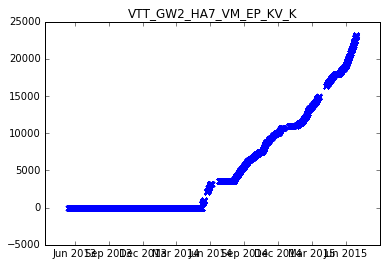

In [3]:
Graph.Show.bin2graph(new_input_file)

---
* 다음 과정은 similarity_module의 경로를 지정하고 확인하는 과정이다

In [4]:
similarity_model_path = os.path.join(GlobalParameter.Repository_Path, GlobalParameter.Model_Path, 'model.bin')
similarity_model_path

'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/model/model.bin'

---
### Step 01. 기존 Similarity Model  

* similarity_model을 출력하여 확인해보자

In [5]:
similarity_model = FileIO.Load.unpickling(similarity_model_path)
similarity_model

{'cosine_similarity': array([[ 0.   ,  0.038,  0.909,  0.066,  0.076,  0.931,  0.194,  0.089,
         -0.994],
        [ 0.038,  0.   ,  0.916,  0.084,  0.071,  0.961,  0.184,  0.07 ,
         -0.994],
        [ 0.909,  0.916,  0.   ,  0.916,  0.911,  0.142,  0.93 ,  0.931,
         -0.999],
        [ 0.066,  0.084,  0.916,  0.   ,  0.003,  0.893,  0.082,  0.045,
         -0.995],
        [ 0.076,  0.071,  0.911,  0.003,  0.   ,  0.881,  0.078,  0.046,
         -0.996],
        [ 0.931,  0.961,  0.142,  0.893,  0.881,  0.   ,  0.885,  0.925,
         -0.999],
        [ 0.194,  0.184,  0.93 ,  0.082,  0.078,  0.885,  0.   ,  0.095,
         -0.997],
        [ 0.089,  0.07 ,  0.931,  0.045,  0.046,  0.925,  0.095,  0.   ,
         -0.995],
        [-0.994, -0.994, -0.999, -0.995, -0.996, -0.999, -0.997, -0.995,  0.   ]]),
 'covariance': array([[  9.90440234e-01,   9.41935308e-01,   8.48112269e-02,
           9.57313075e-01,   9.45224056e-01,   6.45930925e-02,
           8.10657063e-01, 

---
* silmilarity_model이 몇개의 data_file로 구성되어 있는지, file_list의 길이와 similarity matrix의 크기로 확인해보자

In [6]:
len(similarity_model['file_list'])

9

In [7]:
similarity_model['cosine_similarity'].shape

(9, 9)

---
### Step 02. 새로운 Data의 입력 & Similarity  Model의 확장  

* 기존 모델에 new_data를 더한 확장된 모델을 계산/반환하자
    * new_data는 similarity를 계산하기 위해 preprocessing 과정을 거치게 되며,
        * preprocessed_new_data의 경로는 반환되어 added_file_path에 할당됨

In [8]:
similarity_model,added_file_path = Similarity.Model.add_extra_model(similarity_model_path, new_input_file)

---
* added_file_path에 할당된 preprocessed_data의 저장경로를 확인해보자

In [9]:
added_file_path

'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW2_HA7_VM_EP_KV_K.bin'

---
* added_file_path의 data를 graph를 통해 확인해보자
    * preprocessing 된 결과를 확인 가능함

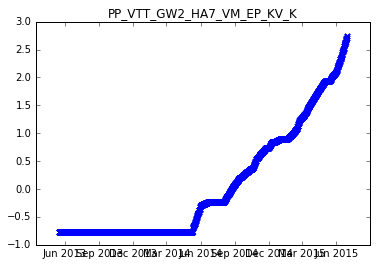

In [10]:
Graph.Show.bin2graph(added_file_path)

---
### Step 03. 확장된 Similarity  Model  

* 확장된 유사도 모델을 확인해보자자
    * 기존 모델의 network에 새로 입력된 data의 node와 edge가 추가된 모델에 해당됨
        * file_list에 new_data의 file 경로가 추가되었으며,
        * similarity matrix가 추가로 계산된 similarity_score로 인하여 row와 column이 확장되었음

In [11]:
similarity_model

{'cosine_similarity': array([[ 0.   ,  0.038,  0.909,  0.066,  0.076,  0.931,  0.194,  0.089,
         -0.994,  0.215],
        [ 0.038,  0.   ,  0.916,  0.084,  0.071,  0.961,  0.184,  0.07 ,
         -0.994,  0.221],
        [ 0.909,  0.916,  0.   ,  0.916,  0.911,  0.142,  0.93 ,  0.931,
         -0.999,  0.93 ],
        [ 0.066,  0.084,  0.916,  0.   ,  0.003,  0.893,  0.082,  0.045,
         -0.995,  0.106],
        [ 0.076,  0.071,  0.911,  0.003,  0.   ,  0.881,  0.078,  0.046,
         -0.996,  0.106],
        [ 0.931,  0.961,  0.142,  0.893,  0.881,  0.   ,  0.885,  0.925,
         -0.999,  0.876],
        [ 0.194,  0.184,  0.93 ,  0.082,  0.078,  0.885,  0.   ,  0.095,
         -0.997,  0.013],
        [ 0.089,  0.07 ,  0.931,  0.045,  0.046,  0.925,  0.095,  0.   ,
         -0.995,  0.145],
        [-0.994, -0.994, -0.999, -0.995, -0.996, -0.999, -0.997, -0.995,
          0.   , -0.996],
        [ 0.215,  0.221,  0.93 ,  0.106,  0.106,  0.876,  0.013,  0.145,
         -0.996

In [12]:
len(similarity_model['file_list'])

10

In [13]:
similarity_model['cosine_similarity'].shape

(10, 10)

---
### Step 04. Similarity Report    


* 블라블라

In [14]:
target_column_model = Similarity.Report.pick_column(similarity_model_path, added_file_path)
target_column_model

{'cosine_similarity': array([ 0.215,  0.221,  0.93 ,  0.106,  0.106,  0.876,  0.013,  0.145,
        -0.996,  0.   ]),
 'covariance': array([ 0.78189968,  0.76899466,  0.06495127,  0.91959244,  0.9201545 ,
         0.11599763,  0.99681723,  0.87275606, -0.00233202,  0.99891519]),
 'euclidean_distance': array([ 178.628,  179.963,  360.15 ,  127.992,  127.546,  351.361,
          43.517,  148.319,  322.602,    0.   ]),
 'file_list': ['/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA10_VM_EP_KV_K.bin',
  '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA10_VM_KV_K.bin',
  '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA10_VM_KV_KAM.bin',
  '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA11_VM_EP_KV_K.bin',
  '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA11_VM_KV_K.bin',
  '/Users/JH/Documents/GitHu

---
* 블라블라

In [15]:
sorted_column_model = Similarity.Report.sorting_column(target_column_model)
sorted_column_model

{'cosine_similarity': [('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW2_HA4_VM_KV_KAM.bin',
   -0.996),
  ('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW2_HA7_VM_EP_KV_K.bin',
   0.0),
  ('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW2_HA4_VM_EP_KV_K.bin',
   0.013000000000000012),
  ('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA11_VM_EP_KV_K.bin',
   0.10599999999999998),
  ('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA11_VM_KV_K.bin',
   0.10599999999999998),
  ('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW2_HA4_VM_KV_K.bin',
   0.14500000000000002),
  ('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA10_VM_EP_KV_K.bin',
   0.21499999999999997),
  ('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_d

---
##### [ covariance report ]

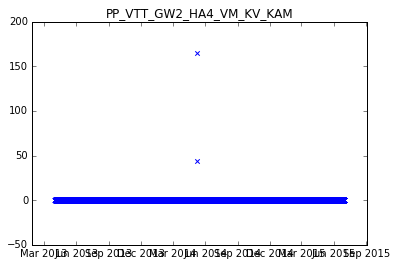

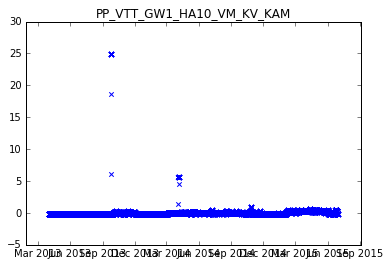

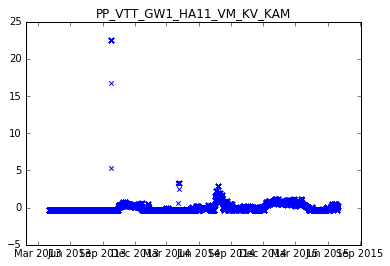

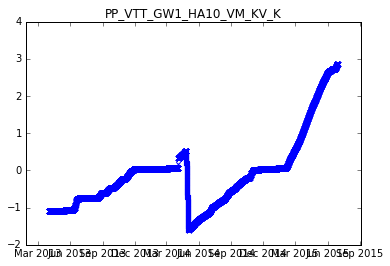

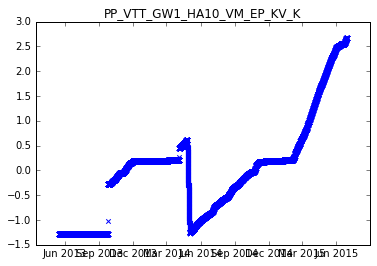

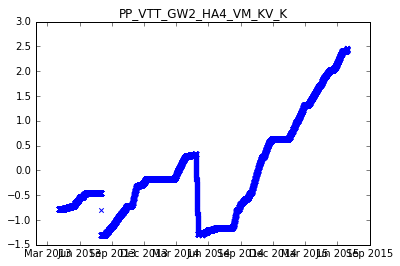

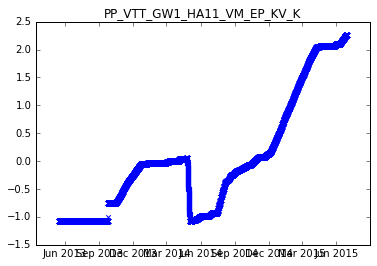

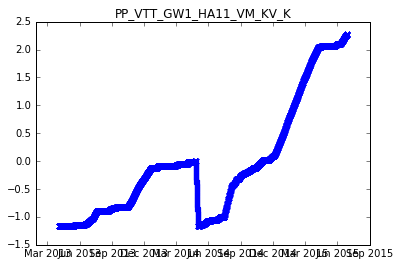

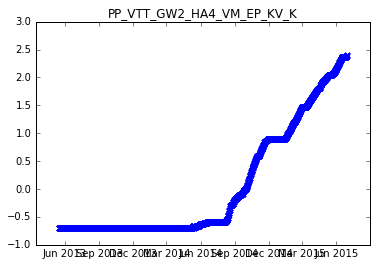

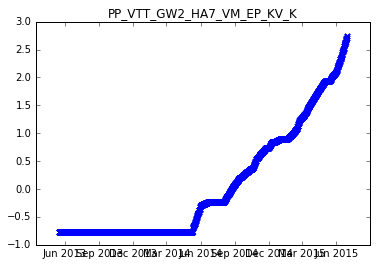

In [16]:
for line in sorted_column_model['covariance']:
    Graph.Show.bin2graph(line[0])

---
##### [ cosine similarity report ]

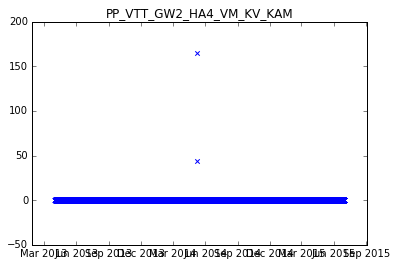

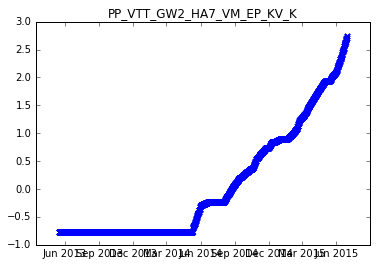

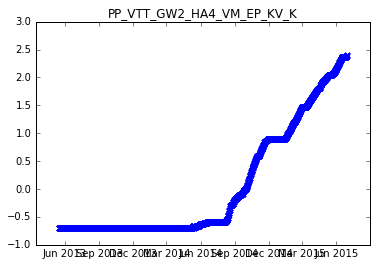

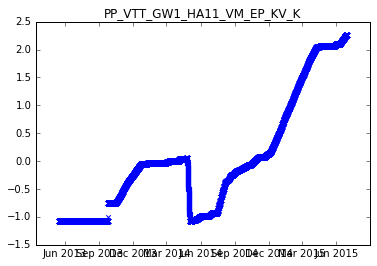

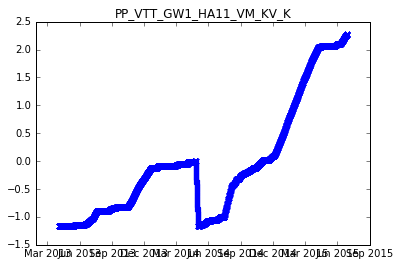

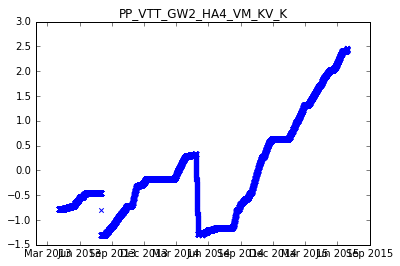

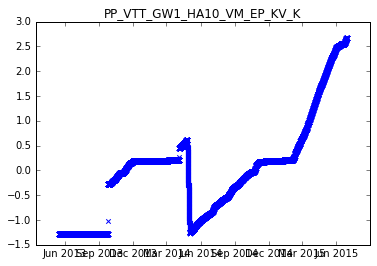

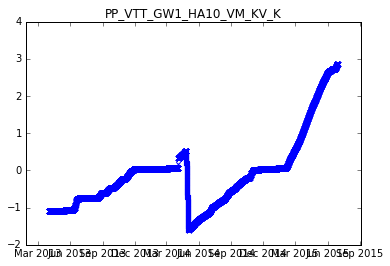

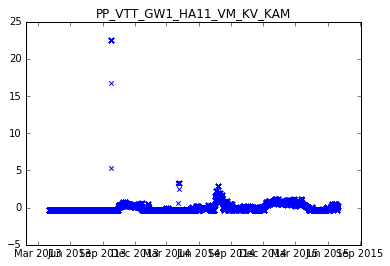

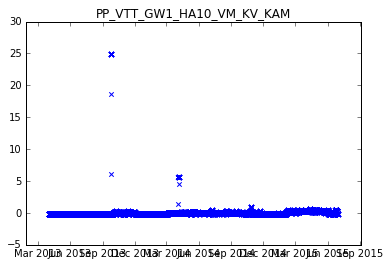

In [17]:
for line in sorted_column_model['cosine_similarity']:
    Graph.Show.bin2graph(line[0])

---
##### [ euclidean similarity report ]

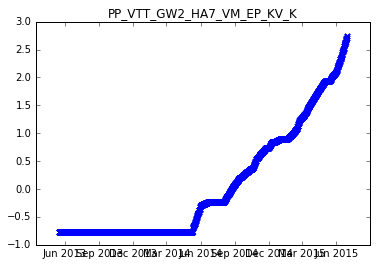

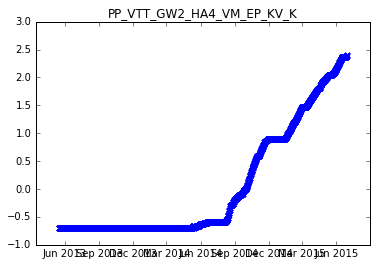

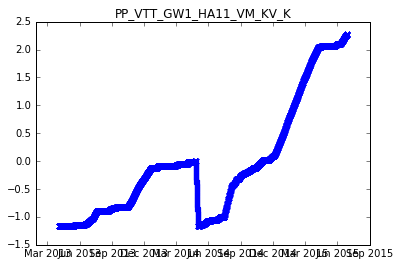

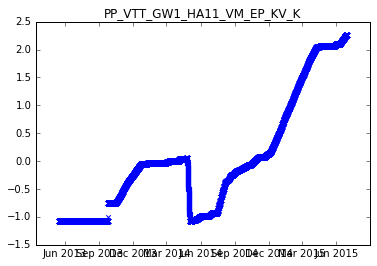

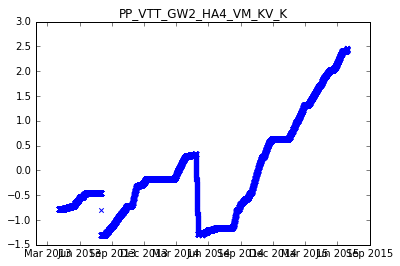

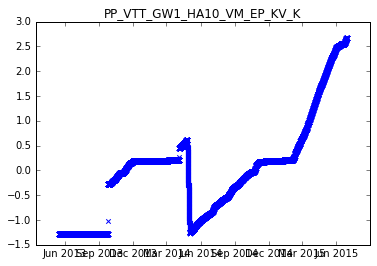

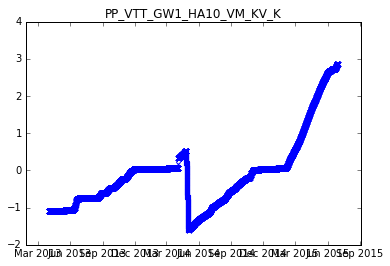

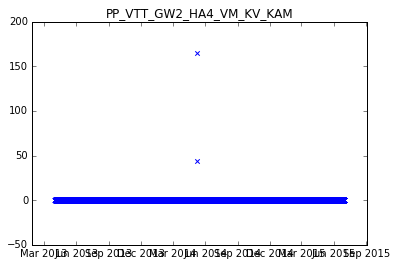

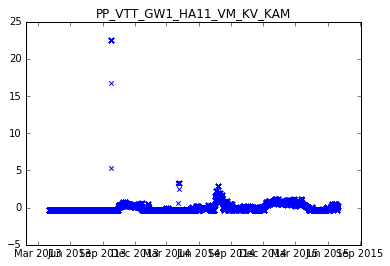

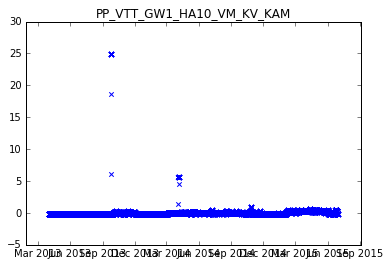

In [18]:
for line in sorted_column_model['euclidean_distance']:
    Graph.Show.bin2graph(line[0])

---
##### [ manhattan similarity report ]

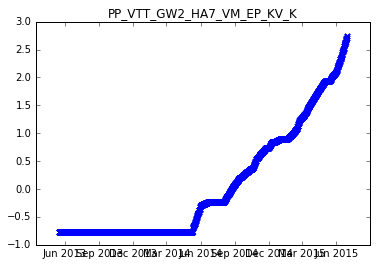

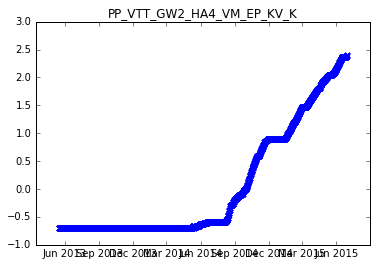

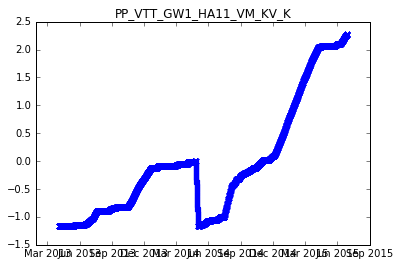

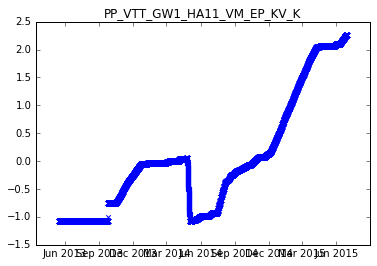

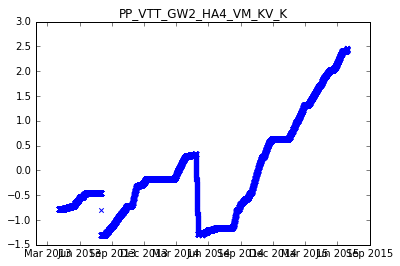

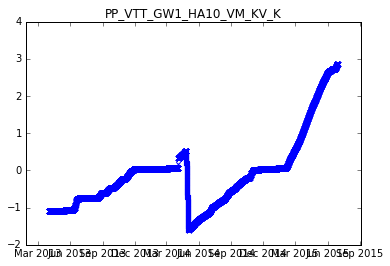

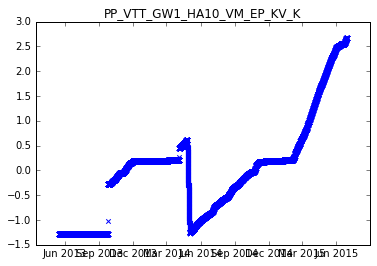

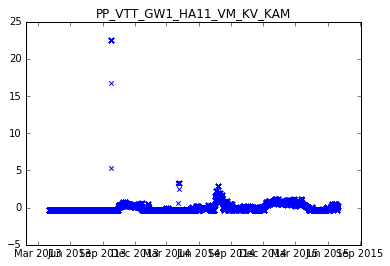

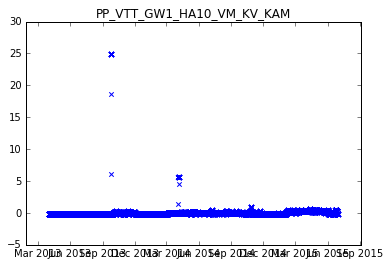

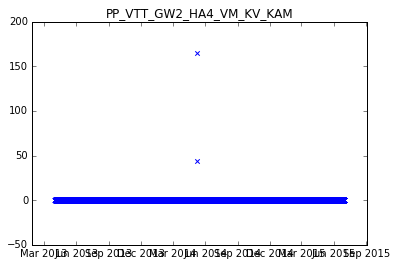

In [19]:
for line in sorted_column_model['manhattan_distance']:
    Graph.Show.bin2graph(line[0])

---
##### [ gradient similarity report ]

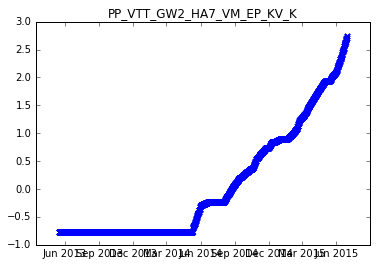

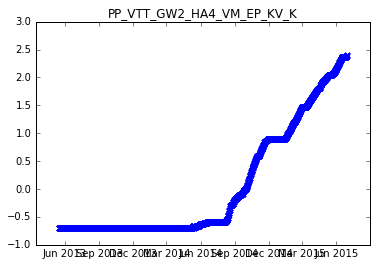

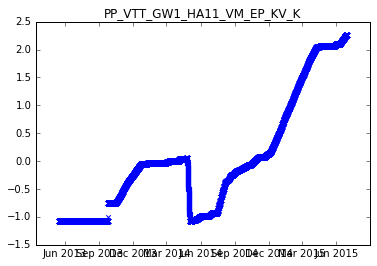

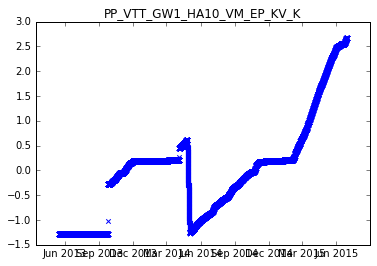

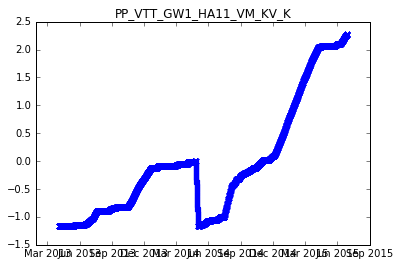

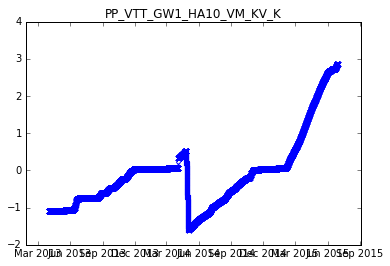

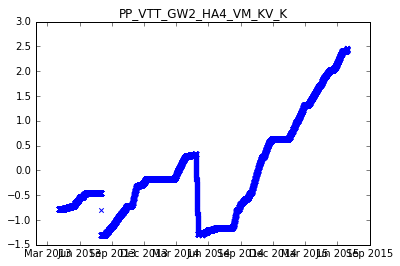

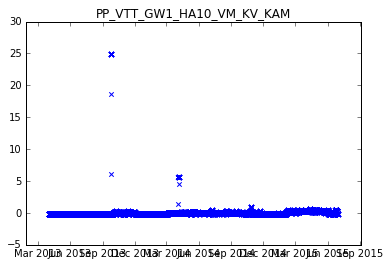

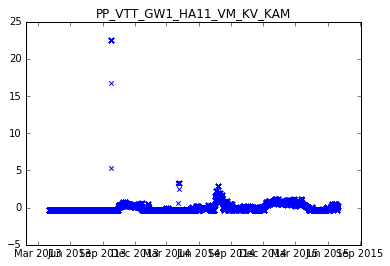

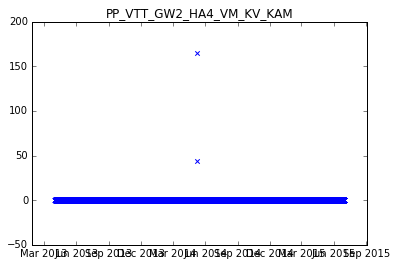

In [20]:
for line in sorted_column_model['gradient_similarity']:
    Graph.Show.bin2graph(line[0])

---
##### [ reversed gradient similarity report ]

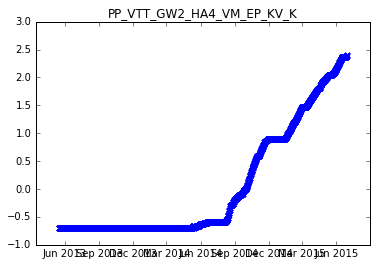

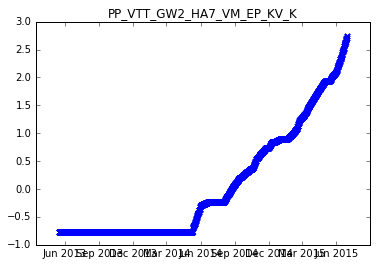

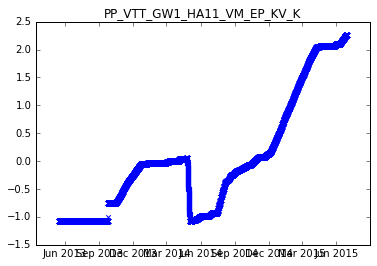

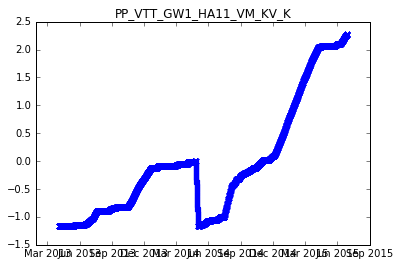

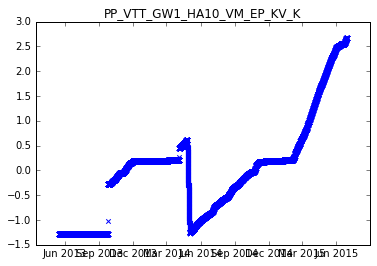

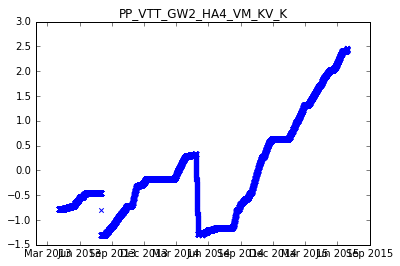

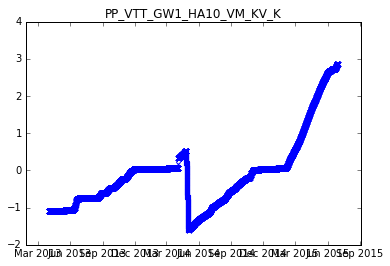

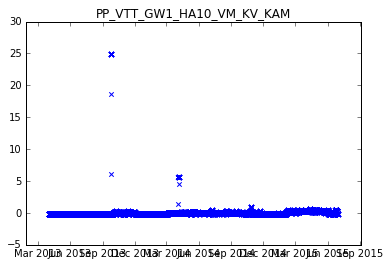

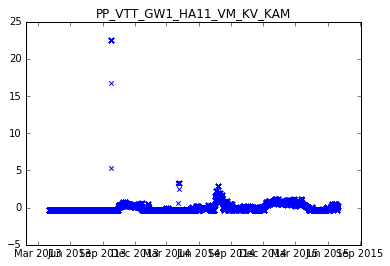

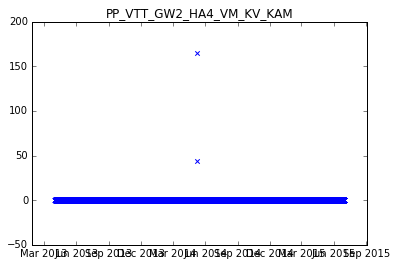

In [21]:
for line in sorted_column_model['reversed_gradient_similarity']:
    Graph.Show.bin2graph(line[0])